In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### <문제(복습)>
1. csv 폴더 안의 drinks.csv 파일 로드
2. 데이터프레임의 정보를 확인하고 결측치가 존재한다면 결측치 개수 확인
3. 컬럼 이름 변경 -> [국가, 맥주소비량, 증류주소비량, 와인소비량, 소비알콜량, 대륙]
4. 대륙 컬럼에 결측치 존재 -> 결측치 'OT'로 대체
5. 새로운 파생변수(총술소비량) -> 맥주소비량 + 증류주소비량 + 와인소비량
6. 새로운 파생변수(도수) -> (소비알콜량 / 총술소비량) * 100
7. 도수 컬럼의 전체 평균을 구하고, 대륙별 도수 평균이 전체 평균보다 높은 대륙 출력

In [2]:
drinks = pd.read_csv('../../csv/drinks.csv')

In [3]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [4]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [5]:
drinks.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [6]:
drinks.columns = ['국가', '맥주소비량', '증류주소비량', '와인소비량', '소비알콜량', '대륙']

- fillna() 함수 내에 inplace=True 적용 가능한 경우
    - 앞의 데이터가 Series or DataFrame
    - 모든 인덱스를 수정하는 경우

In [7]:
drinks['대륙'].fillna('OT', inplace=True)
# drinks['대륙'] = drinks['대륙'].fillna('OT')
# Series 전체의 데이터에서 fillna() 함수를 호출하면 
# inplace = True를 이용해서 원본의 데이터 수정이 가능

C:\Users\toqha\AppData\Local\Temp\ipykernel_23312\1703920672.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  drinks['대륙'].fillna('OT', inplace=True)


In [8]:
drinks.isna().sum()

국가        0
맥주소비량     0
증류주소비량    0
와인소비량     0
소비알콜량     0
대륙        0
dtype: int64

In [9]:
# 총술소비량 파생변수 생성
# case 1
drinks['총술소비량'] = drinks['맥주소비량'] + drinks['증류주소비량'] + drinks['와인소비량']

In [10]:
# case 2
# 맥주소비량부터 와인소비량까지 필터 -> 합산 함수 sum() 사용
drinks.loc[:, '맥주소비량':'와인소비량'].sum(axis=1)
# drinks['총술소비량'] = drinks.loc[:, '맥주소비량':'와인소비량'].sum(axis=1)

0        0
1      275
2       39
3      695
4      319
      ... 
188    436
189    114
190      6
191     55
192     86
Length: 193, dtype: int64

In [11]:
drinks['도수'] = (drinks['소비알콜량'] / drinks['총술소비량']) * 100

In [12]:
drinks.head()

,국가,맥주소비량,증류주소비량,와인소비량,소비알콜량,대륙,총술소비량,도수
0,Afghanistan,0,0,0,0.0,AS,0,NaN
1,Albania,89,132,54,4.9,EU,275,1.781818
2,Algeria,25,0,14,0.7,AF,39,1.794872
3,Andorra,245,138,312,12.4,EU,695,1.784173
4,Angola,217,57,45,5.9,AF,319,1.849530


In [13]:
drinks.isna().sum()

국가         0
맥주소비량      0
증류주소비량     0
와인소비량      0
소비알콜량      0
대륙         0
총술소비량      0
도수        13
dtype: int64

In [14]:
# 도수 컬럼의 데이터가 결측치인 데이터 확인
# 인덱스의 조건식 -> 도수 컬럼의 데이터 중 결측치인
flag = drinks['도수'].isna()
drinks.loc[flag, :]

,국가,맥주소비량,증류주소비량,와인소비량,소비알콜량,대륙,총술소비량,도수
0,Afghanistan,0,0,0,0.0,AS,0,NaN
13,Bangladesh,0,0,0,0.0,AS,0,NaN
46,North Korea,0,0,0,0.0,AS,0,NaN
79,Iran,0,0,0,0.0,AS,0,NaN
90,Kuwait,0,0,0,0.0,AS,0,NaN
97,Libya,0,0,0,0.0,AF,0,NaN
103,Maldives,0,0,0,0.0,AS,0,NaN
106,Marshall Islands,0,0,0,0.0,OC,0,NaN
107,Mauritania,0,0,0,0.0,AF,0,NaN
111,Monaco,0,0,0,0.0,EU,0,NaN


- 새로 생성된 도수 컬럼의 결측치 대체 없이 전체평균도수 vs 대륙별평균도수 비교

In [15]:
group_mean = drinks.groupby('대륙')['도수'].mean()

In [16]:
all_mean = drinks['도수'].mean()

In [17]:
group_mean

대륙
AF    5.272516
AS    1.945398
EU    1.834226
OC    1.802179
OT    1.785407
SA    1.786790
Name: 도수, dtype: float64

In [18]:
all_mean

np.float64(2.8000875325551746)

In [19]:
group_mean > all_mean

대륙
AF     True
AS    False
EU    False
OC    False
OT    False
SA    False
Name: 도수, dtype: bool

In [20]:
for i in range(len(group_mean)):
    if group_mean.iloc[i] > all_mean:
        print(group_mean.index[i])

AF


In [21]:
group_mean[group_mean > all_mean]

대륙
AF    5.272516
Name: 도수, dtype: float64

- 도수의 결측치를 0으로 대체 한 후 전체평균도수 vs 대륙별평균도수 비교

In [22]:
# 도수의 결측치 -> 0으로 대체하고 평균 도수 생성
# 대륙별 그룹화
drinks['도수'].fillna(0, inplace=True)
drinks['도수'].isna().sum()

C:\Users\toqha\AppData\Local\Temp\ipykernel_23312\1702928703.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  drinks['도수'].fillna(0, inplace=True)


np.int64(0)

In [23]:
all_mean2 = drinks['도수'].mean()
all_mean2

np.float64(2.6114806003105255)

In [24]:
group_mean2 = drinks.groupby('대륙')['도수'].mean()
group_mean2

대륙
AF    4.974072
AS    1.635903
EU    1.752705
OC    1.689543
OT    1.785407
SA    1.786790
Name: 도수, dtype: float64

In [25]:
group_mean2[group_mean2 > all_mean2]

대륙
AF    4.974072
Name: 도수, dtype: float64

In [26]:
# 대륙이 AF인 데이터 확인
flag = drinks['대륙']=='AF'
drinks.loc[flag, :]

,국가,맥주소비량,증류주소비량,와인소비량,소비알콜량,대륙,총술소비량,도수
2,Algeria,25,0,14,0.7,AF,39,1.794872
4,Angola,217,57,45,5.9,AF,319,1.849530
18,Benin,34,4,13,1.1,AF,51,2.156863
22,Botswana,173,35,35,5.4,AF,243,2.222222
26,Burkina Faso,25,7,7,4.3,AF,39,11.025641
27,Burundi,88,0,0,6.3,AF,88,7.159091
28,Cote d'Ivoire,37,1,7,4.0,AF,45,8.888889
29,Cabo Verde,144,56,16,4.0,AF,216,1.851852
31,Cameroon,147,1,4,5.8,AF,152,3.815789
33,Central African Republic,17,2,1,1.8,AF,20,9.000000


#### 총술소비량 기준으로 우리나라는 몇위인가?
    1. 총술소비량 기준 내림차순 정렬
    2. 인덱스를 초기화, 기존의 인덱스는 제거
    3. 국가 컬럼의 데이터가 South Korea인 데이터 확인
    4. 해당 데이터에서 index+1 이 우리나라 순위
    5. 총술소비량이 0인 데이터는 제외하고, 나머지 데이터를 기준으로 막대 그래프 생성
    6. South Korea의 막대를 선택해서 색상 변경, 주석 추가


In [27]:
# 총술소비량 기준으로 내림차순 정렬
drinks.sort_values(['총술소비량'], ascending=False, inplace=True)
drinks

,국가,맥주소비량,증류주소비량,와인소비량,소비알콜량,대륙,총술소비량,도수
3,Andorra,245,138,312,12.4,EU,695,1.784173
45,Czech Republic,361,170,134,11.8,EU,665,1.774436
68,Grenada,199,438,28,11.9,OT,665,1.789474
61,France,127,151,370,11.8,EU,648,1.820988
141,Russian Federation,247,326,73,11.5,AS,646,1.780186
...,...,...,...,...,...,...,...,...
97,Libya,0,0,0,0.0,AF,0,0.000000
103,Maldives,0,0,0,0.0,AS,0,0.000000
111,Monaco,0,0,0,0.0,EU,0,0.000000
158,Somalia,0,0,0,0.0,AF,0,0.000000


In [28]:
# 인덱스를 초기화하고 기존의 인덱스 제거
drinks.reset_index(drop=True, inplace=True)
drinks

,국가,맥주소비량,증류주소비량,와인소비량,소비알콜량,대륙,총술소비량,도수
0,Andorra,245,138,312,12.4,EU,695,1.784173
1,Czech Republic,361,170,134,11.8,EU,665,1.774436
2,Grenada,199,438,28,11.9,OT,665,1.789474
3,France,127,151,370,11.8,EU,648,1.820988
4,Russian Federation,247,326,73,11.5,AS,646,1.780186
...,...,...,...,...,...,...,...,...
188,Libya,0,0,0,0.0,AF,0,0.000000
189,Maldives,0,0,0,0.0,AS,0,0.000000
190,Monaco,0,0,0,0.0,EU,0,0.000000
191,Somalia,0,0,0,0.0,AF,0,0.000000


In [29]:
# South Korea의 데이터 확인
flag = drinks['국가'] == 'South Korea'
drinks.loc[flag, ]

,국가,맥주소비량,증류주소비량,와인소비량,소비알콜량,대륙,총술소비량,도수
98,South Korea,140,16,9,9.8,AS,165,5.939394


In [30]:
# South Korea의 인덱스값 저장
korea_idx = drinks.loc[flag, ].index[0]
korea_idx

np.int64(98)

In [31]:
korea_value = drinks.loc[korea_idx, '총술소비량']
korea_value

np.int64(165)

In [32]:
# 총술소비량이 0인 데이터는 제외
# 총술소비량이 0이 아닌 데이터만 추출
flag = drinks['총술소비량']!=0
drinks = drinks.loc[flag, ]

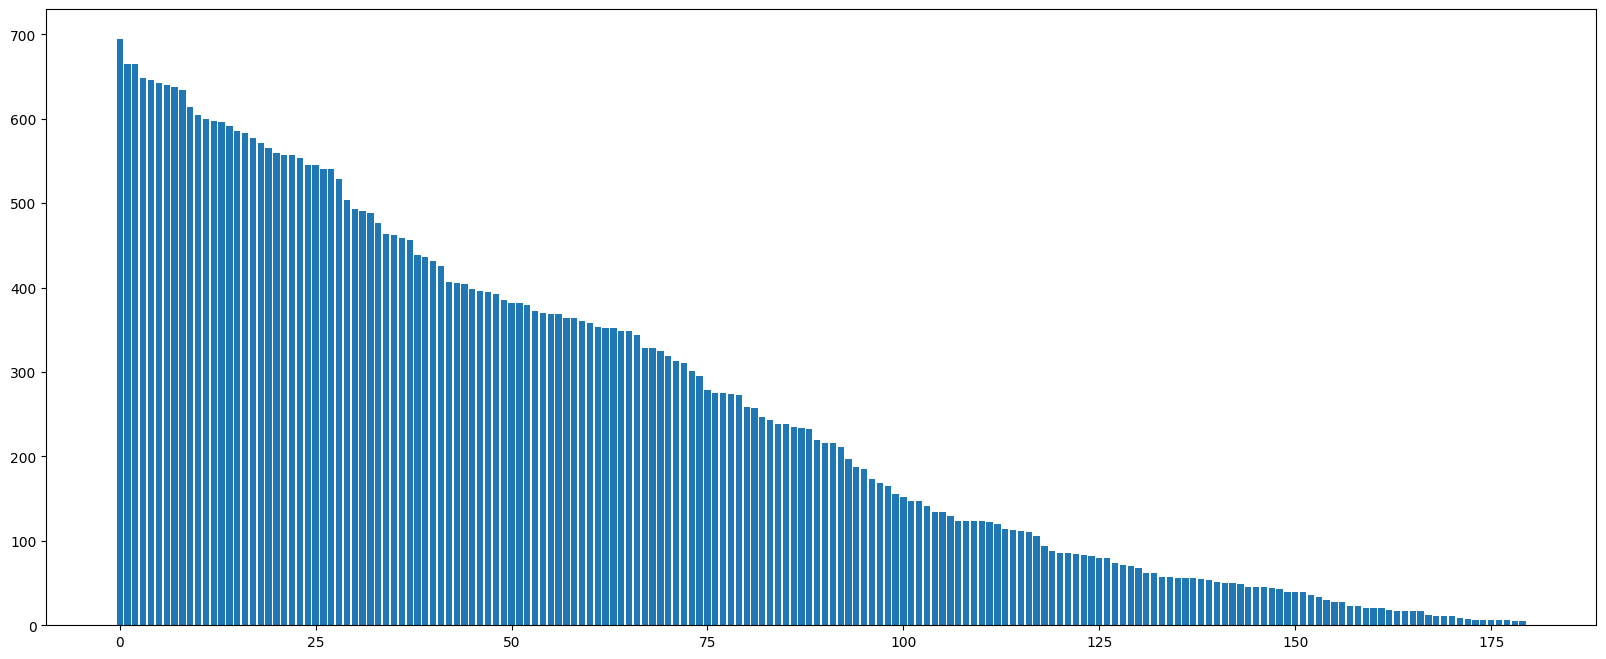

In [33]:
# 막대 그래프를 생성
# x축 : drinks의 인덱스
# y축 : drinks의 총술소비량

x = drinks.index
y = drinks['총술소비량']

# 그래프가 그려지는 공간의 크기 조정
plt.figure(figsize=(20, 8))
bar_list = plt.bar(x, y)

plt.show()

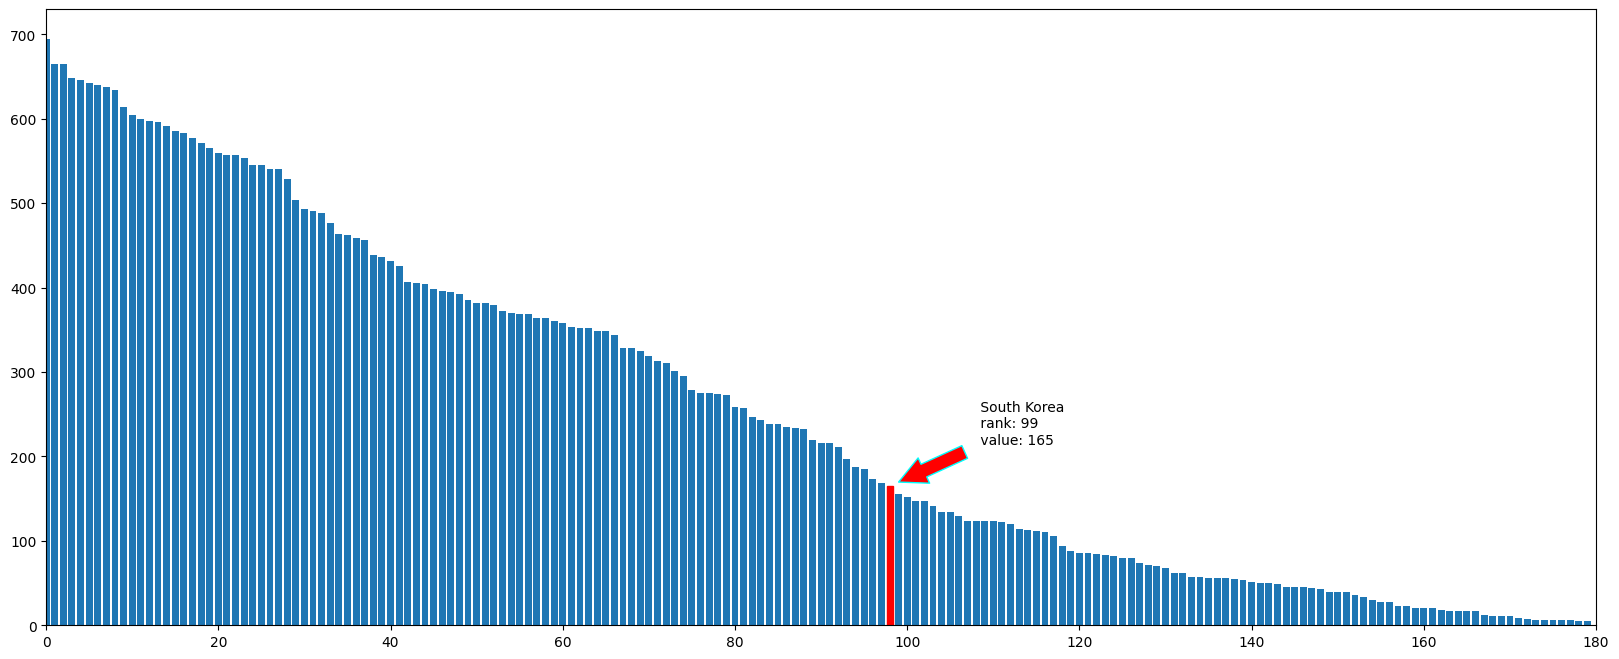

In [34]:
# 그래프가 그려지는 공간의 크기 조정
plt.figure(figsize=(20, 8))
# 막대 그래프 생성
bar_list = plt.bar(x, y)

# korea_idx의 위치에 있는 막대를 선택해서 색상을 빨간색으로 변경
bar_list[korea_idx].set_color('r')

# 주석을 추가
plt.annotate(
    f' South Korea \n rank: {korea_idx+1} \n value: {korea_value} ',
    xy = (korea_idx, korea_value),              # xy: 주석의 위치
    xytext = (korea_idx+10, korea_value+50),    # xytest: 주석 텍스트 위치 변경
    arrowprops = {
        'facecolor' : 'r',          # 화살표 내부 색상
        'edgecolor' : 'cyan',       # 화살표 테두리 색상
        'headwidth' : 20,           # 화살표 머리 너비
        'headlength' : 20,          # 화살표 머리 길이
        'width' : 10,               # 화살표 꼬리 너비
        'shrink' : 0.1              # 화살표와 주석 문자의 거리
    }
)

# x축의 범위 지정
plt.xlim(0, 180)

plt.show()

- 도수 컬럼을 기준으로 한국은 몇위인가?
    1. 도수 컬럼 기준 내림차순 정렬
    2. 인덱스를 초기화, 기존의 인덱스 제거
    3. 국가가 South Korea인 데이터에서 index값 변수에 저장
    4. 국가가 South Korea인 데이터에서 도수의 값을 변수에 저장
    5. 막대 그래프 생성 (x축 데이터: index, y축 데이터: 도수)
    6. 해당하는 막대 그래프에서 한국의 막대를 선택하여 색상 빨간색으로 변경
    7. 주석을 추가

In [35]:
drinks

,국가,맥주소비량,증류주소비량,와인소비량,소비알콜량,대륙,총술소비량,도수
0,Andorra,245,138,312,12.4,EU,695,1.784173
1,Czech Republic,361,170,134,11.8,EU,665,1.774436
2,Grenada,199,438,28,11.9,OT,665,1.789474
3,France,127,151,370,11.8,EU,648,1.820988
4,Russian Federation,247,326,73,11.5,AS,646,1.780186
...,...,...,...,...,...,...,...,...
175,Niger,3,2,1,0.1,AF,6,1.666667
176,Timor-Leste,1,1,4,0.1,AS,6,1.666667
177,Yemen,6,0,0,0.1,AS,6,1.666667
178,Saudi Arabia,0,5,0,0.1,AS,5,2.000000


In [40]:
drinks.sort_values('도수', ascending=False, inplace=True)
drinks

C:\Users\toqha\AppData\Local\Temp\ipykernel_23312\2645391306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drinks.sort_values('도수', ascending=False, inplace=True)


,국가,맥주소비량,증류주소비량,와인소비량,소비알콜량,대륙,총술소비량,도수
171,Gambia,8,0,1,2.4,AF,9,26.666667
154,Sierra Leone,25,3,2,6.7,AF,30,22.333333
143,Nigeria,42,5,2,9.1,AF,49,18.571429
139,Uganda,45,9,0,8.3,AF,54,15.370370
145,Rwanda,43,2,0,6.8,AF,45,15.111111
...,...,...,...,...,...,...,...,...
173,Myanmar,5,1,0,0.1,AS,6,1.666667
175,Niger,3,2,1,0.1,AF,6,1.666667
174,Indonesia,5,1,0,0.1,AS,6,1.666667
177,Yemen,6,0,0,0.1,AS,6,1.666667


In [41]:
drinks.reset_index(drop=True, inplace=True)
drinks

,국가,맥주소비량,증류주소비량,와인소비량,소비알콜량,대륙,총술소비량,도수
0,Gambia,8,0,1,2.4,AF,9,26.666667
1,Sierra Leone,25,3,2,6.7,AF,30,22.333333
2,Nigeria,42,5,2,9.1,AF,49,18.571429
3,Uganda,45,9,0,8.3,AF,54,15.370370
4,Rwanda,43,2,0,6.8,AF,45,15.111111
...,...,...,...,...,...,...,...,...
175,Myanmar,5,1,0,0.1,AS,6,1.666667
176,Niger,3,2,1,0.1,AF,6,1.666667
177,Indonesia,5,1,0,0.1,AS,6,1.666667
178,Yemen,6,0,0,0.1,AS,6,1.666667


In [43]:
flag = drinks['국가']=='South Korea'
drinks.loc[flag, ]

,국가,맥주소비량,증류주소비량,와인소비량,소비알콜량,대륙,총술소비량,도수
14,South Korea,140,16,9,9.8,AS,165,5.939394


In [55]:
korea_idx2 = drinks.loc[flag, ].index[0]

In [78]:
korea_value2 = drinks.loc[korea_idx2, ]['도수']

In [79]:
korea_value2

np.float64(5.93939393939394)

In [ ]:
x2 = drinks.index
y2 = drinks['도수']

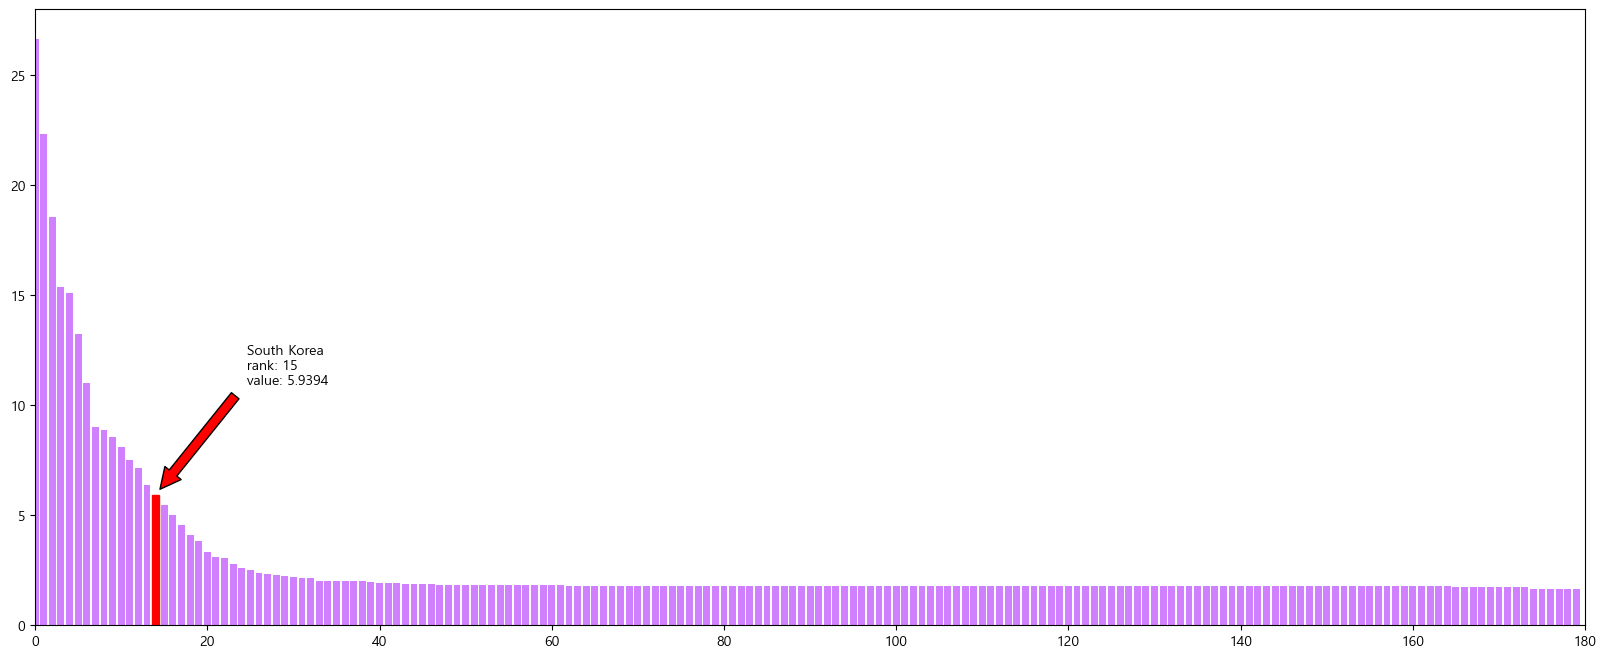

In [100]:
# 그래프 사이즈 변경
plt.figure(figsize=(20, 8))
# 막대 그래프 생성
bar_list2 = plt.bar(x2, y2, color="#D080FF")

# korea_idx2의 위치에 있는 막대를 선택해서 색상을 빨간색으로 변경
bar_list2[korea_idx2].set_color('r')

# 주석을 추가
plt.annotate(
    f' South Korea \n rank: {korea_idx2+1} \n value: {korea_value2:.4f} ',
    xy = (korea_idx2, korea_value2),                # xy: 주석의 위치
    xytext = (korea_idx2+10, korea_value2+5),       # xytest: 주석 텍스트 위치 변경
    arrowprops = {
        'facecolor' : 'r',          # 화살표 내부 색상
        'edgecolor' : 'k',          # 화살표 테두리 색상
        'headwidth' : 15,           # 화살표 머리 너비
        'headlength' : 15,          # 화살표 머리 길이
        'width' : 7,                # 화살표 꼬리 너비
        'shrink' : 0.05              # 화살표와 주석 문자의 거리
    }
)

# x축의 범위 지정
plt.xlim(0, 180)

plt.show()